# Ad Revenue for Moblie Apps

The goal for this project is to find which Apps are returning the most value for ad revenue spent. Higher value ads are the ones seen by more people. Therefore this project aims to find which tpes of ads attract the most users.  

The two main stores where people purchase free and non-free apps are Google and Andriod. There are over 4 million apps in both the App store and Google Play. To ease working with this dataset, a smaple will be used containing 10,000 Andriod apps from Google Play, and 7,000 apps from the App Store. 

In [9]:
from csv import reader
import os

In [10]:
### Find Current Working Directory ###
cwd = os.getcwd()
data_file_path = os.path.join(os.path.dirname(cwd), 'data') #need to move out of notebook folder and into data folder, without diplaying full contents of folder name
os.chdir(data_file_path)

In [11]:
### The Google Play data set ###
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store data set ###
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

To make it easier to explore data sets without examining all the data, we'll write a function named explore_data() that we can use repeatedly to explore a specific number of rows in an easily readable way. We'll also add an option to this function to show the total number of rows and columns for the data set.



In [12]:
def explore_data(dataset, start, end, rows_and_columns=False):
    """Prints the rows for the dataset on new lines"""
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [13]:
### Call explore_data and print the header for googleplaystore.csv ###

print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


The Andriod Dataset contains 10k+ rows and 13 columns. 

In [14]:
### Call explore_data and print the header for AppleStore.csv ###

print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


The IOS dataset has 7k + Apps, with 13 columns. Some columns are not self-explanatory, but can be clarified in the documentation of the dataset. The most interesting columns are 'track_name', 'currency', 'price', 'rating_count_total', 'content_rating', 'prime_genre', 

# Cleaning Data: Deleting Data

In Kaggle's online discussion section of the Google Play data set, there is an upvoted post that points out a null value in row 10472 (not including the header). This should not be ignored. 

In [15]:
print(android_header, '\n')
print(android[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


Row index 10472, contains a missing value in the Genres column. Best practice is to delete that row from the dataset since we can not replace or average the missing data with some alternative. 

In [16]:
#Checking length to see that only one entry is removed. 
print(len(android))
del android[10472]
print(len(android))

10841
10840


There is nothing in Kaggle's discussion section regarding errors in the App Store data set.

# Removing Duplicate Entries

The Andriod and IOS datasets are likley to have multiple duplcate entries of the same Apps. Checking the popular App 'Instagram' confirms our asumption. 

In [17]:
print(android_header, '\n')

counter = 0
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)
        counter +=1
        
print('\n',"There are", counter, "Instagram Apps in the Andriod Store.")

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

 There are 4 Instagram Apps in the Andriod Store.


By looking at the reviews column, we can see that data was taken from the 'Instagram' app at different times, leaving a different number of reviews each time. We should only keep the one with the most reviews, because it would be the most recent entry. 

But First..

Lets write a function that can find the total amount of duplicate entries in the datasets. 

In [18]:
# Checking for duplicate Apps in android
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('The number of duplicate Apps in Android is', len(duplicate_apps))
print('\n')
print('The number of unique Apps in Android is', len(unique_apps))

The number of duplicate Apps in Android is 1181


The number of unique Apps in Android is 9659


According to the results there are 1181 duplicate Apps in the Android dataset. Best practice is to get rid of these apps and keeping the entry with the highest number of reviews. This method will keep the most recent data entry for each app. 

In [19]:
# Finding the ideal dataset, and creating a dictionary for remvoing duplicate entries later. 
# Print str to check work at end of removing apps. 
print('The number of apps left in Android should be', len(unique_apps))
reviews_max_android = {} #Creating empty dictionary. Key = name, Value = review count
#Writing a funciton to clear duplicate apps.
for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max_android and reviews_max_android[name] < n_reviews:
        reviews_max_android[name] = n_reviews
    if name not in reviews_max_android:
        reviews_max_android[name] = n_reviews

# Print str to check our work
print('The number of apps left in Anroid is', len(reviews_max_android))

The number of apps left in Android should be 9659
The number of apps left in Anroid is 9659


In [20]:
#Repeat checking Apps for Apple Dataset
duplicate_apps = []
unique_apps = []

for app in ios:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('The number of duplicate Apps in Apple is', len(duplicate_apps))
print('The number of unique Apps in Apple is', len(unique_apps))

The number of duplicate Apps in Apple is 0
The number of unique Apps in Apple is 7197


In [21]:
print('The number of apps left in Apple should be', len(unique_apps))
reviews_max_ios = {}

for app in ios:
    name = app[0]
    n_reviews = float(app[5])
    if name in reviews_max_ios and reviews_max_ios[name] < n_reviews:
        reviews_max_ios[name] = n_reviews
    if name not in reviews_max_ios:
        reviews_max_ios[name] = n_reviews
        
print('The number of apps left in Apple is', len(reviews_max_ios))

The number of apps left in Apple should be 7197
The number of apps left in Apple is 7197


Now lets remove the duplicate entries using the dicitonary created earlier 'reviews_max_[(Android Appple)]', keeping only the ones with the highest review count. Since ios does not have any duplicate entries, we will only do this for android. 

In [22]:
android_clean = [] ### Will store the new android dataset ###
already_added = [] ### Keeps track of all stored app names ###

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if (reviews_max_android[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

Now lets explore the new android_clean dataset

In [23]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


There are 9659 rows in Andriod dataset, showing that the duplicate entries have been removed. Before continuing it is a good idea to change the name of the Apple dataset to be similar to the Android dataset, showing that the same cleaning process has been run on each. 

In [24]:
ios_clean = ios

# Removing Non-English Apps

### Part One

The copmany using this data is only interested in apps whose primary language is English.  

To find if an app has been created for English users we can use the ASCII dictionary. All characters specific to English texts are encoded using the ASCII standard, where each English character has a corresponding number between 0 and 127. With this information we can create a function that removes all rows with characters outside of the Enligsh texts.

In [25]:
def is_english(string):
    for letter in string:
        if ord(letter) > 127:
            return False
        
    return True

In [26]:
print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


Some app names do have other symbols within thier names which fall outside the 127 characters in ASCII. Therefore we can write a formula that only excludes an app if it has more than three characters outside of 0-127 ASCII. We are going to alter our is_english function.

In [27]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
            
    if non_ascii > 3:
        return False
    else:
        return True
        
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


Now we want to run the is_english on both andriod_clean and ios data sets.

In [28]:
android_english = [] #New dataset for only Android English Apps
ios_english = [] #New dataset for only Apple English Apps
#Write Function to clear out non English apps using func is_english
for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
#Write Function to clear out non English apps using func is_english    
for app in ios_clean:
    name = app[1]
    if is_english(name):
        ios_english.append(app)

#Checking a few entries in the new datasets
explore_data(android_english, 0, 3, True)
print('Number of Andriod Apps that are non-English is', (len(android_clean)-len(android_english)))
                                                         
explore_data(ios_english, 0, 3, True)
print('Number of Apple Apps that are non-English is', (len(ios_clean)-len(ios_english)))
   

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13
Number of Andriod Apps that are non-English is 45
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '

Interesting to see that out of 9k+ Andriod Apps, on 45 were non-english, while the 6k+ Apple store Apps had 1k + non-english apps. Quite a large difference. 

# Removing Non-Free Apps

The company requesting this analysis only cares about free Apps.
Lets remove all non-free apps from both the android_english and ios_english datasets.
First lets find where the price is in each dataset by looking at the columns, then we will remove any app where price does not equal the relative term for free.

In [29]:
print(android_header)
print('\n')
print(ios_header)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


In [30]:
android_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
ios_final = []

for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
explore_data(android_final, 0, 2, True)
explore_data(ios_final, 0, 2, True)
print('Number of non-free Android Apps are', (len(android_english)-len(android_final)))
print('Number of non-free Apple Apps are', (len(ios_english)-len(ios_final)))


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 8864
Number of columns: 13
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 3222
Number of columns: 16
Number of non-free Android Apps are 750
Number of non-free Apple Apps are 2961


From the recent analysis of the two datasets, it is clear that Apple has a much larger international market, and a larger percentage of their store is non-free apps. Maybe when we start to explore the data in more detail we will find out possible explanations as to why. 

# Exploratory Analysis

The end goal is to add the newly created app on both Google Play and the App Store. Therefore we need to find app profiles that are successful on both markets. 

We start the analysis by finding the most common genres in each market. This is the best place to start because it is the widest scope, and starts to mold the idea of the app, with a very general, vague starting point.

To accomplish this task we must find the genre app location, and then create a frequency talbe to find the most common genres and thier frequency in each seperate store, Google or Apple. 

### Step 1: Find Genre Column

In [31]:
print(android_header)
print(ios_header)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


For Android, Genre column is in the 9th. The Apple Genre is in the 11th.

### Step 2: Write a function that displays a frequency table.

The reason we have a seperate function is due to dictionaries not having order. Dictionary can give the frequency of each genre, but we can sort them to find the highest frequency genre. 

To accomplish this task the function 'display table' will: 
* Generate a frequency table
* Transform that frequency table into a list of tuples. Tuples, over dictionaries, will return the genre and the frequency when the 'sorted' function is called.
* Print the entries in descending order

In [40]:
def freq_table(dataset, index): #Adding parameters so freq_table can be called on Android and Apple
    table = {} #Create dictionary to store frequencies. 
    total = 0 #Frequency number
    
    for row in dataset:
        total += 1
        genre = row[index] #index included in parameter
        if genre in table:
            table[genre] += 1
        else:
            table[genre] = 1
    
    table_percentages = {} #Care more about percentage then the total number 
    for key in table:
        percentage = (table[key] / total) * 100
        if percentage > 1:
            table_percentages[key] = percentage 
    
    return table_percentages

### Displaying the frequency table, by turning it into a tuple, sorting by descending, and printing ###
def display_table(dataset, index):
    table = freq_table(dataset, index) #Previous function created
    table_display = [] #Empty list we can sort
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
            

In [93]:
import matplotlib.pyplot as plt

# Function to create and display a bar plot
def display_bar_plot(dataset, index, name):
    table = freq_table(dataset, index)
    
    sorted_keys = sorted(table.keys()) #frequency table creates a dicationary called "table"
    sorted_values = [table[key] for key in sorted_keys]
    
    plt.figure(figsize=(10, 6))
    plt.bar(table.keys(), table.values(), color='skyblue')
    plt.xlabel('Genre/Category')
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of Genres/Categories for {name}' )
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

# Function to create and display a pie chart
# def display_pie_chart(dataset, index):
#     table = freq_table(dataset, index)
#     plt.figure(figsize=(8, 8))
#     plt.pie(table.values(), labels=table.keys(), autopct='%1.1f%%', startangle=140)
#     plt.title('Percentage Distribution of Genres/Categories')
#     plt.show()

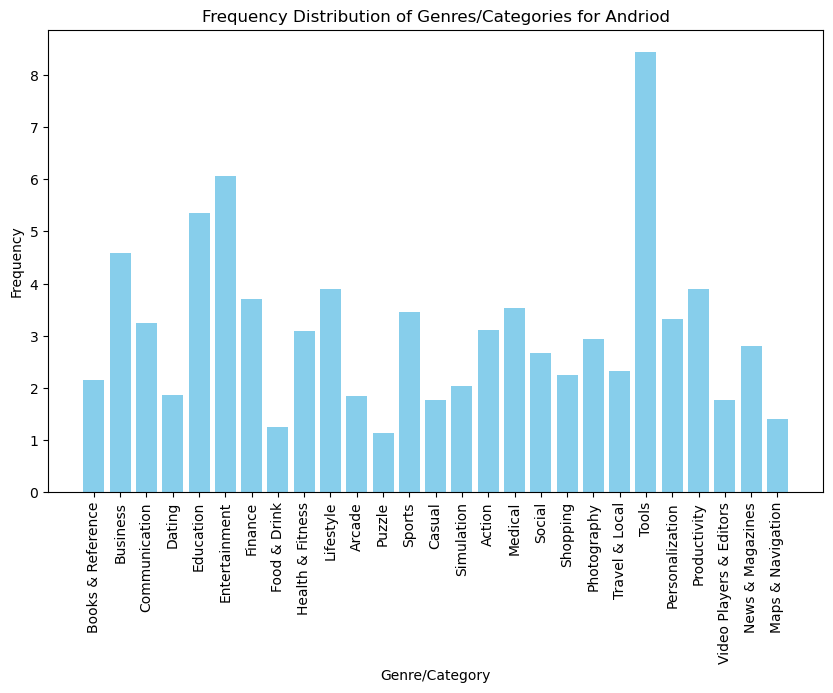

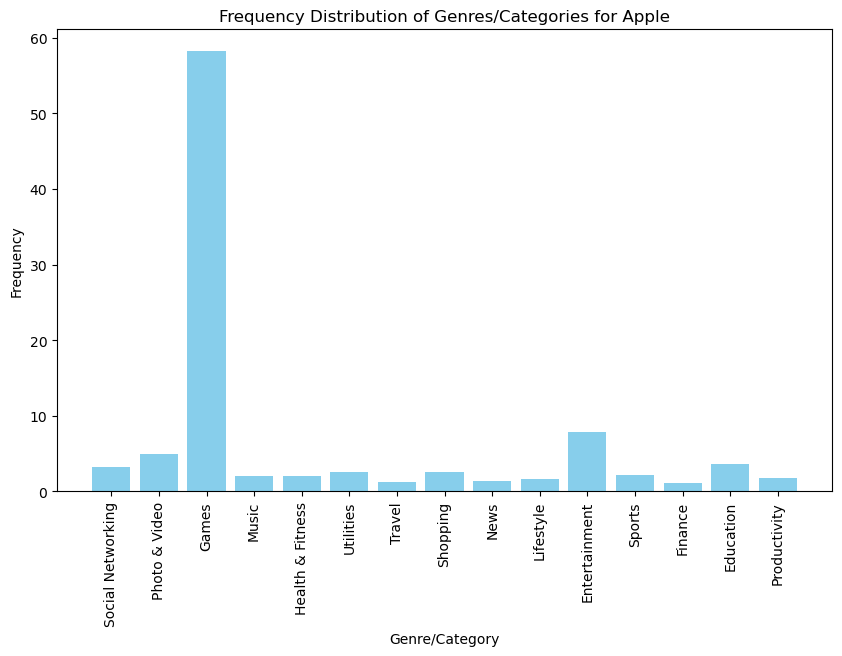

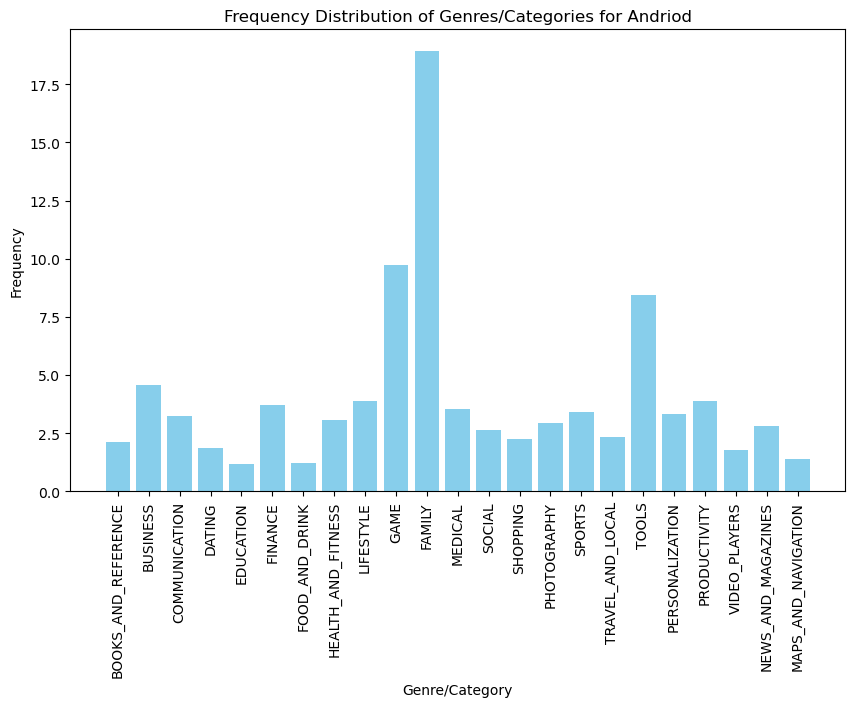

In [94]:
display_bar_plot(android_final, 9, "Andriod")
display_bar_plot(ios_final, 11, "Apple")
display_bar_plot(android_final, 1, "Andriod")

In [33]:
display_table(ios_final, 11) # Displaying the Prime Genre frequency for IOS

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


In [34]:
display_table(android_final, 9) # Displays the Genre frequency for Android 

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

In [35]:
display_table(android_final, 1) # Displays the Category frequency for Andriod 

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

### Step 3: Analyze the Results (Frequency Tables)

#### App Genre Frequency

#### IOS App Frequency

For IOS App store, the resutls show an overwhelming (58%) amount of Apps that fall into the Game genre. Runner up being entertainment at 7.8% and photo and video at 4.9%. This table shows that the IOS App store is more popular with entertainment apps, rather than ultility apps. 

Although this table shows that Games and Entertainment are overwhelming popular on the IOS platform, this could be due to developers creating many different types of these apps becasuse there could be more room for creativity or some other factor. This does not confirm that these apps also have the most users, and it alone can not confirm that the company should make a App that falls into the game Genre. It could in fact show that the Game genre is oversaturated in this market with heavy compition. 

#### Android App Frequency

The 'Prime Genre' column has too many different categories which the apps can fall into. The number is not comparable to the IOS app store, and the large amount can give unclear results. For this reason it is better to analyze the result from the 'Category' column in the Android dataset.

Family (18.9%) is the most popular followed by 'Game' (9.7%). 'Tools' (8.4%), 'Business', 'Lifestyle', 'Productivity', and 'Finance'. These results show that the Android Apps focus on Family and games first, and then have more practical uses. The Family Category is not completly self-explanatory, and it might be of use to examine what apps are falling under this category. 

### Frequency of Users per Genre

To find this information, the Installs column in the Android dataset and the rating_count_column in the IOS dataset can be used. 

Below, we calculate the average number of user ratings per app genre on the App Store

In [36]:
genre_ios = freq_table(ios_final, 11) ### genre_ios is a tuple list of [(Games:frequency), (Entertainment: frequency),...]
print(genre_ios)

{'Social Networking': 3.2898820608317814, 'Photo & Video': 4.9658597144630665, 'Games': 58.16263190564867, 'Music': 2.0484171322160147, 'Reference': 0.5586592178770949, 'Health & Fitness': 2.0173805090006205, 'Weather': 0.8690254500310366, 'Utilities': 2.5139664804469275, 'Travel': 1.2414649286157666, 'Shopping': 2.60707635009311, 'News': 1.3345747982619491, 'Navigation': 0.186219739292365, 'Lifestyle': 1.5828677839851024, 'Entertainment': 7.883302296710118, 'Food & Drink': 0.8069522036002483, 'Sports': 2.1415270018621975, 'Book': 0.4345127250155183, 'Finance': 1.1173184357541899, 'Education': 3.662321539416512, 'Productivity': 1.7380509000620732, 'Business': 0.5276225946617008, 'Catalogs': 0.12414649286157665, 'Medical': 0.186219739292365}


In [37]:
genre_ios = freq_table(ios_final, 11) ### genre_ios is a tuple list of [(Games:frequency), (Entertainment: frequency),...]

for genre in genre_ios: ### Iterate through each row in genre_ios 
    total_ratings = 0   ### Make an empty list to add all the ratings of each app genre
    len_genre = 0       ### Make an empty list to add the number of apps in that genre, so we can calculate the avg n_ratings  
    for app in ios_final:   ### Iterate through each row in ios_final
        genre_app = app[11] ### Set the genre equal to the value in the 11th column of ios_final. Call it genre_app
        if genre_app == genre:         ### If the value in 11th column of ios_final equals the key in genre_ios, we going to calculate. 
            n_ratings = float(app[5])  ### Ratings be over in the 5th column. 
            total_ratings += n_ratings ### Add the 5th column value to the total_ratings.
            len_genre += 1             ### Add one to the total number of entries so we know how many are in each genre
    avg_ratings = total_ratings / len_genre ### Calulate to get avg_ratings for each genre. THE END GAME
    print(genre, ':', avg_ratings)          ### Printing the result in a tuple
    

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


Although the 'Games' genre makes up for most of the apps in IOS, the 'Navigation' Genre has the most ratings, which is indicitive of users, with three times more ratings. 